<a href="https://colab.research.google.com/github/theanhvu1998/VuTheAnh_Assignment/blob/master/Copy_of_Weekly_Project_BBC_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [345]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [346]:
bbc.sample(5)

,category,text
65,tech,broadband in the uk growing fast high-speed ne...
1802,sport,souness eyes summer move for owen newcastle bo...
557,business,us bank boss hails genius smith us federal r...
916,business,enron bosses in $168m payout eighteen former e...
812,politics,ukip could sue veritas defectors the uk indepe...


In [347]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### EDA & Data transformation

In [348]:
# Your code here
from sklearn.model_selection import train_test_split

train, test = train_test_split(bbc, test_size=0.2)

In [349]:
print("total record:", len(bbc.index))

total record: 2225


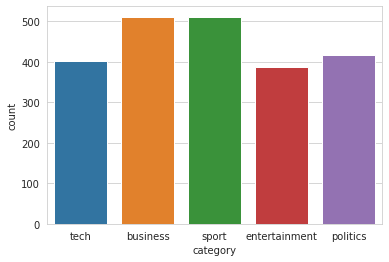

In [350]:
sns.countplot(bbc["category"])

In [351]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [352]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [353]:
import re
def remove_non_word(text):
   emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
   text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
   return text

### Train models

In [354]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=remove_non_word)

In [355]:
bbc["text"]

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [356]:
logistic  = LogisticRegression(random_state=0)

In [357]:
pipeline = Pipeline(steps=[('vect', tfidf),
                ('logistic', logistic)])
pipeline.fit(train["text"], train["category"])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function remove_non_word at 0x7f58141410d0>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f5814de29d8>,
                                 use_idf=True, vocabulary=None)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
     

In [358]:
p_predict = pipeline.predict_proba(test["text"])
f_predict = pipeline.predict(test["text"])
p_predict = pd.DataFrame(p_predict).reindex().rename(columns={0: "business",1: "entertainment",2: "politics",3: "sport",4: "tech"}, errors="raise")
f_predict = pd.DataFrame(f_predict).rename(columns={0: "Predict"}, errors="raise")
predict = pd.concat([test["text"].reset_index(), test["category"].reset_index(),f_predict.reindex(),p_predict], axis=1)
predict.drop("index", axis=1)

,text,category,Predict,business,entertainment,politics,sport,tech
0,schools to take part in mock poll record numbe...,politics,politics,0.100519,0.091243,0.640944,0.070132,0.097161
1,barclays profits hit record level barclays th...,business,business,0.954380,0.013269,0.011232,0.009905,0.011213
2,apple sues to stop product leaks computer firm...,tech,tech,0.146665,0.069890,0.050785,0.061914,0.670746
3,blind student hears in colour a blind studen...,tech,tech,0.075722,0.108242,0.089300,0.060339,0.666397
4,uk firm faces venezuelan land row venezuelan a...,business,business,0.643779,0.058772,0.145040,0.061756,0.090653
...,...,...,...,...,...,...,...,...
440,blair dismisses quit claim report tony blair h...,politics,politics,0.012158,0.007364,0.968266,0.006211,0.006000
441,consumer spending lifts us growth us economic ...,business,business,0.925973,0.017038,0.019388,0.019490,0.018111
442,prince crowned top music earner prince earne...,entertainment,entertainment,0.109646,0.763785,0.027697,0.056407,0.042465
443,actress roberts takes spider role actress juli...,entertainment,entertainment,0.036085,0.801688,0.030555,0.059202,0.072469


### Evaluate Model

In [359]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = pipeline.predict(test["text"])
print('accuracy:',accuracy_score(test["category"],predictions))
print('confusion matrix:\n',confusion_matrix(test["category"],predictions))
print('classification report:\n',classification_report(test["category"],predictions))

accuracy: 0.9752808988764045
confusion matrix:
 [[100   0   0   0   1]
 [  2  75   0   0   0]
 [  3   1  86   0   1]
 [  1   0   0 102   0]
 [  0   2   0   0  71]]
classification report:
                precision    recall  f1-score   support

     business       0.94      0.99      0.97       101
entertainment       0.96      0.97      0.97        77
     politics       1.00      0.95      0.97        91
        sport       1.00      0.99      1.00       103
         tech       0.97      0.97      0.97        73

     accuracy                           0.98       445
    macro avg       0.98      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



### Fine-tunning

In [360]:
from sklearn.model_selection import GridSearchCV
parameters = {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logistic__penalty':['l2', 'l1', 'elasticnet']}

gridsearch_models = GridSearchCV(pipeline,
                                 parameters,
                                 scoring='accuracy',
                                 cv=5, n_jobs=-1)

gridsearch_models.fit(train["text"], train["category"])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [361]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'logistic__C': 100, 'logistic__penalty': 'l2'}
Best score 0.9808988764044944


In [362]:
best_model = gridsearch_models.best_estimator_

In [363]:
p_predict = best_model.predict_proba(test["text"])
f_predict = best_model.predict(test["text"])
p_predict = pd.DataFrame(p_predict).reindex().rename(columns={0: "business",1: "entertainment",2: "politics",3: "sport",4: "tech"}, errors="raise")
f_predict = pd.DataFrame(f_predict).rename(columns={0: "Predict"}, errors="raise")
predict = pd.concat([test["text"].reset_index(), test["category"].reset_index(),f_predict.reindex(),p_predict], axis=1)
predict.drop("index", axis=1)

,text,category,Predict,business,entertainment,politics,sport,tech
0,schools to take part in mock poll record numbe...,politics,politics,0.006487,0.005453,0.977572,0.002927,0.007562
1,barclays profits hit record level barclays th...,business,business,0.999914,0.000032,0.000021,0.000014,0.000020
2,apple sues to stop product leaks computer firm...,tech,tech,0.011882,0.002700,0.001117,0.002006,0.982294
3,blind student hears in colour a blind studen...,tech,tech,0.002107,0.006119,0.003152,0.001201,0.987421
4,uk firm faces venezuelan land row venezuelan a...,business,business,0.983282,0.001641,0.009231,0.001503,0.004342
...,...,...,...,...,...,...,...,...
440,blair dismisses quit claim report tony blair h...,politics,politics,0.000025,0.000014,0.999946,0.000007,0.000008
441,consumer spending lifts us growth us economic ...,business,business,0.998996,0.000233,0.000280,0.000254,0.000237
442,prince crowned top music earner prince earne...,entertainment,entertainment,0.003574,0.995260,0.000202,0.000509,0.000455
443,actress roberts takes spider role actress juli...,entertainment,entertainment,0.000332,0.994622,0.000435,0.001470,0.003141


In [364]:
predictions = best_model.predict(test["text"])
print('Accuracy Score:', accuracy_score(test["category"], predictions))

Accuracy Score: 0.9752808988764045


### Export models


In [365]:
import pickle

pickle.dump(best_model, open('logisticRegression.pkl', 'wb'))

In [366]:
with open('logisticRegression.pkl', 'rb') as model:
    reload_model = pickle.load(model)
preds = reload_model.predict_proba(test["text"])

p_predict = clf.predict_proba(test["text"])
f_predict = clf.predict(test["text"])
p_predict = pd.DataFrame(p_predict).reindex().rename(columns={0: "business",1: "entertainment",2: "politics",3: "sport",4: "tech"}, errors="raise")
f_predict = pd.DataFrame(f_predict).rename(columns={0: "Predict"}, errors="raise")
predict = pd.concat([test["text"].reset_index(), test["category"].reset_index(),f_predict.reindex(),p_predict], axis=1)
predict.drop("index", axis=1)

,text,category,Predict,business,entertainment,politics,sport,tech
0,schools to take part in mock poll record numbe...,politics,politics,0.084236,0.075968,0.704837,0.060161,0.074799
1,barclays profits hit record level barclays th...,business,business,0.955003,0.013974,0.010405,0.009554,0.011064
2,apple sues to stop product leaks computer firm...,tech,tech,0.171902,0.072490,0.053404,0.067845,0.634360
3,blind student hears in colour a blind studen...,tech,tech,0.101608,0.142400,0.115838,0.075967,0.564187
4,uk firm faces venezuelan land row venezuelan a...,business,business,0.645619,0.057940,0.152406,0.059385,0.084651
...,...,...,...,...,...,...,...,...
440,blair dismisses quit claim report tony blair h...,politics,politics,0.013168,0.007604,0.966595,0.006715,0.005919
441,consumer spending lifts us growth us economic ...,business,business,0.926863,0.017012,0.017990,0.019747,0.018388
442,prince crowned top music earner prince earne...,entertainment,entertainment,0.090394,0.790259,0.025744,0.053149,0.040453
443,actress roberts takes spider role actress juli...,entertainment,entertainment,0.043205,0.793391,0.033976,0.062753,0.066675
